# <center>Проверка гипотез по увеличению выручки в интернет-магазине, с оценкой результата A/B теста</center>

**Цели исследования:** Провести приоритизацию, представленных гипотез, с использованием фреймворков `ICE` и `RICE`. Проанализировать результаты А/В теста.

**Часть 1. Приоритизация гипотез**
Представленны 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Часть 2. Анализ результатов A/B-теста**
Представленны два датафрейма с информацией по заказам и посетителям интернет-магазина.

**План работ:**
 - Провести обзор данных
 - Сделать предобработку данных
 - Приоритезация гипотез
 - Анализ результатов А/В-теста
 - Выводы и рекомендации

**Оглавление**
1. Обзор данных
2. Предобработка данных
3. Приоритезация гипотез
4. Анализ А/В-теста
5. Дополнительные расчеты
6. Выводы
7. Рекомендации

## Обзор данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt
import scipy.stats as stats
pd.options.display.max_colwidth = 110

In [ ]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [ ]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
min(orders['date']), max(orders['date'])

('2019-08-01', '2019-08-31')

In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
min(visitors['date']), max(visitors['date'])

('2019-08-01', '2019-08-31')

In [ ]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Вывод

- Для приоритезации представленны 9 гипотез
- А/В тест проводился 31 день
- Необходимо привести к стандартному названия колонок
- Изменение типа данных

## Предобработка данных

### Изменение название колонок и форматов данных в датафреймах 

In [ ]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [ ]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [ ]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Проверка на дубликаты

In [ ]:
orders.duplicated().sum(), visitors.duplicated().sum(), hypothesis.duplicated().sum()

(0, 0, 0)

Явных дубликатов в данных нет

### Исследование датафреймов

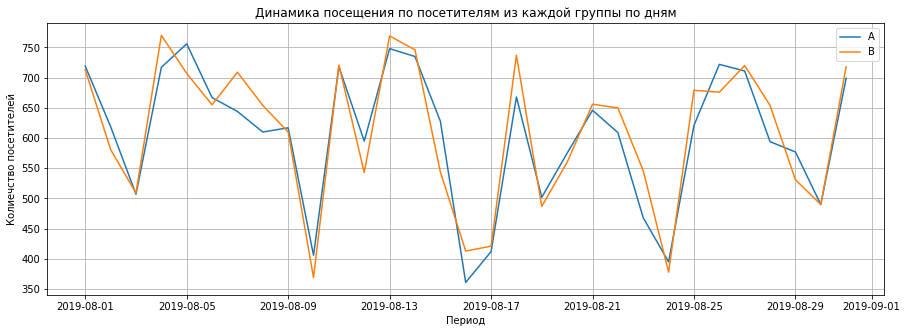

In [ ]:
plt.figure(figsize=(15, 5))
for group, group_data in visitors.groupby('group'):
    plt.plot(group_data['date'], group_data['visitors'], label=group)
    plt.title("Динамика посещения по посетителям из каждой группы по дням")
    plt.xlabel('Период')
    plt.ylabel('Колиечство посетителей')
    plt.grid(True)
    plt.legend();
plt.show()

In [ ]:
orders.groupby('group').agg({'visitor_id': 'nunique'})

,visitor_id
group,
A,503
B,586


Количество уникальных пользователей в каждой группе

In [ ]:
group_b_visitors = orders.query('group == "B"')['visitor_id'].unique()

In [ ]:
group_a_visitors = orders.query('group == "A"')['visitor_id'].unique()

Пользователи, которые попали в обе группы и их процентное отношение относительно общей выборки

In [ ]:
visitors_in_both_groups = orders.groupby('visitor_id').agg({'group': 'nunique'}).reset_index().query('group > 1')

In [ ]:
visitors_in_both_groups.visitor_id.count()

58

In [ ]:
round(len(orders.query('visitor_id in @visitors_in_both_groups["visitor_id"]')) / len(orders) * 100, 2)

15.12

In [ ]:
round(orders.query('visitor_id in @visitors_in_both_groups["visitor_id"]').revenue.sum() / orders.revenue.sum() * 100, 2)

15.6

**ВЫВОД**

- Изменили название колонок, привели к формату datetime данные о датах
- В тестирование представленны две группы (А и В)
- Динамика посещения по посетителям из каждой группы по дням, говорит о том, что в субботу(иногда в пятницу) видно сильные провалы по посещению
- Есть посетители, которые попали в обе группы, они составляют 15,12% от общего количества посетителей, которые что-то приобрели и 15,6% от общего объема выручки, удалять такой большой объем информации не целесообразно. Также данных пользователей нельзя удалить, по причине того, что данные в датафрейме visitors уже агрегированы и удалить их оттуда невозможно.

## Приоритезация гипотез

Фреймворк `ICE` - это метод приоритизации идей или фич. Рассчитывается по формулу  (Impact * Confidence) / Efforts.

Фреймворк `RICE` - это метод приоритизации идей или фич. Рассчитывается по формулу  (Reach * Impact * Confidence) / Efforts, отличается от `ICE` наличием параметра Reach.

- Reach — охват
- Impact — влияние
- Confidence — уверенность в вашей оценке охвата, влияния и трудозатрат
- Effort — трудозатраты

### Приоритезация гипотез методом `ICE`

In [ ]:
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)

In [ ]:
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Приоритезация гипотез методом `RICE`

In [ ]:
hypothesis['rice'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)

In [ ]:
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### ВЫВОД


Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Топ 5 гипотез по методу `ICE`:
- Номер 8 - "Запустить акцию, дающую скидку на товар в день рождения"
- Номер 0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
- Номер 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
- Номер 6 - "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
- Номер 2 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"

Топ 5 гипотез по методу `RICE`:
- Номер 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
- Номер 2 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
- Номер 0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
- Номер 6 - "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
- Номер 8 - "Запустить акцию, дающую скидку на товар в день рождения"

В топ 5 гипотез обоих методов, входят одинаковые гипотезы, меняется только их приоритетность. В отличие от метода `ICE`, метод `RICE` использует такой параметр, как `reach` - охват пользователей. Из-за это гипотеза номер 8 и перемещяется с первого места, на пятое, так как и распостроняется на всю аудиторию, но может быть использована только в день рождения. Гипотеза номер 7 перемещается с третьего, на первое место, по причине того, что это может сильно увеличить объем базы клиентов для email-рассылок, которые могут направляться каждый день.

## Анализ A/B-теста

### График кумулятивной выручки по группам

In [ ]:
dates_groups = orders[['date', 'group']].drop_duplicates()

In [ ]:
orders_aggregated = (
    dates_groups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}),
           axis=1)
    .sort_values(by=['date','group'])
)

In [ ]:
visitors_aggregated = (
    dates_groups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
           .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

In [ ]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [ ]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

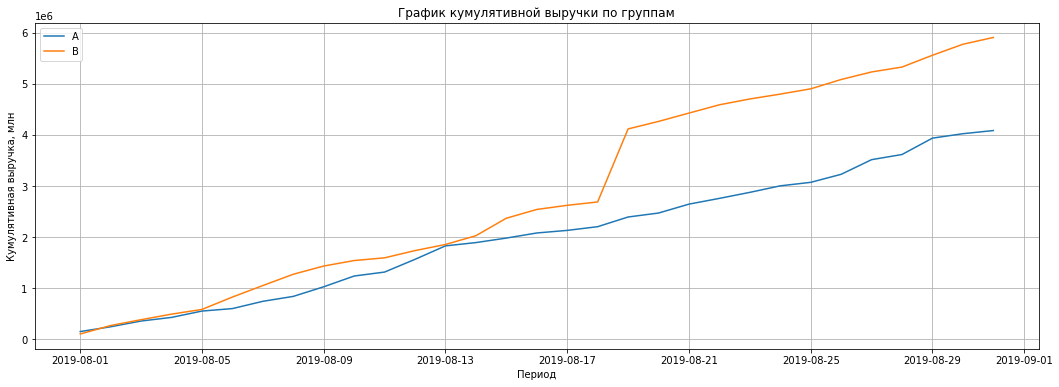

In [ ]:
plt.figure(figsize=(18, 6))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.ylabel('Кумулятивная выручка, млн')
plt.xlabel('Период')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.grid(True);


#### ВЫВОД

Выручка почти равномерно увеличивается в течение всего теста.
Однако графики выручки группы В в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека по группам

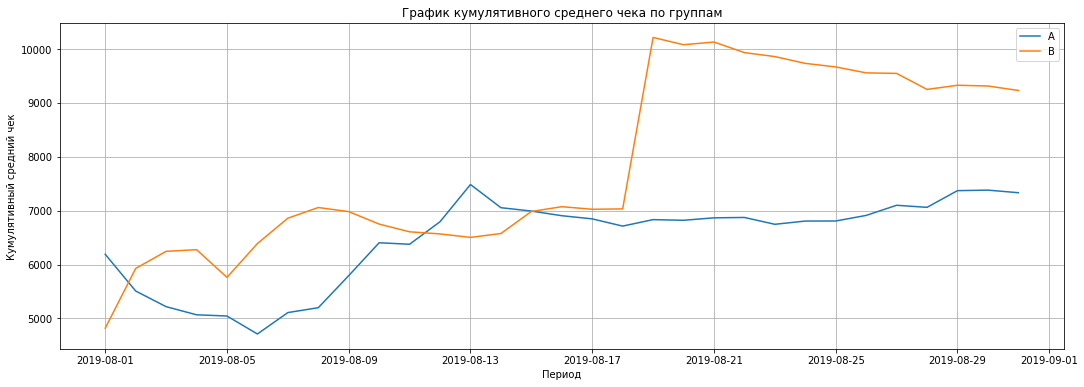

In [ ]:
plt.figure(figsize=(18, 6))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Период')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.grid(True);

#### ВЫВОД

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике).

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [ ]:
merged_cumulative_revenue = (
    cumulative_revenue_a
    .merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
)

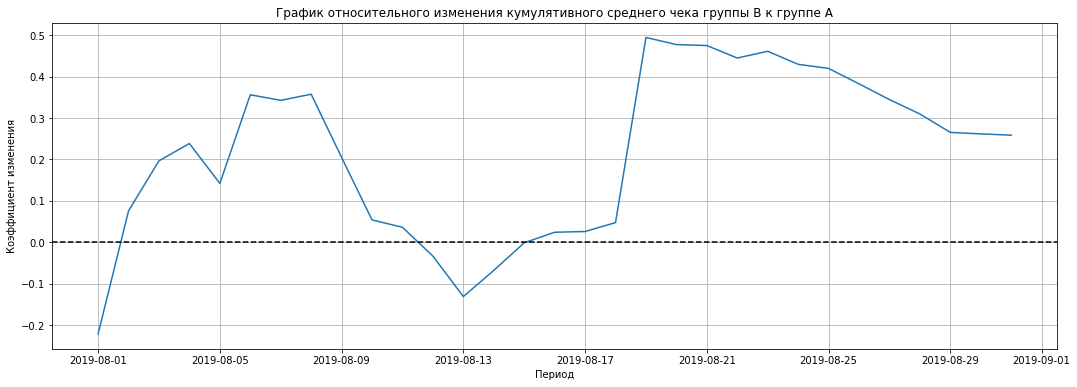

In [ ]:
plt.figure(figsize=(18, 6))

plt.plot(
    merged_cumulative_revenue['date'],
    (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])
    /(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)


plt.ylabel('Коэффициент изменения')
plt.xlabel('Период')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--');

#### ВЫВОД

В нескольких точках график различия между сегментами резко «скачет». Где-то присутствуют крупные заказы и выбросы. Явные всплески происходили с 01.08.2019 по 04.08.2019 и с 18.08.2019 по 19.08.2019

### График кумулятивного среднего количества заказов (конверсия) по группам

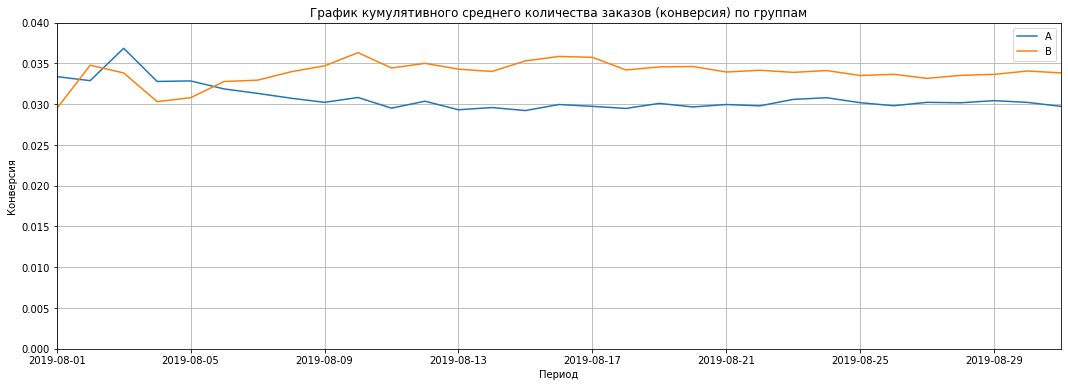

In [ ]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(18, 6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.ylabel('Конверсия')
plt.xlabel('Период')
plt.title('График кумулятивного среднего количества заказов (конверсия) по группам')
plt.legend()
plt.grid(True)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.040]);

#### ВЫВОД

Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### График относительного изменения кумулятивного среднего количества заказов (конверсия) группы B к группе A

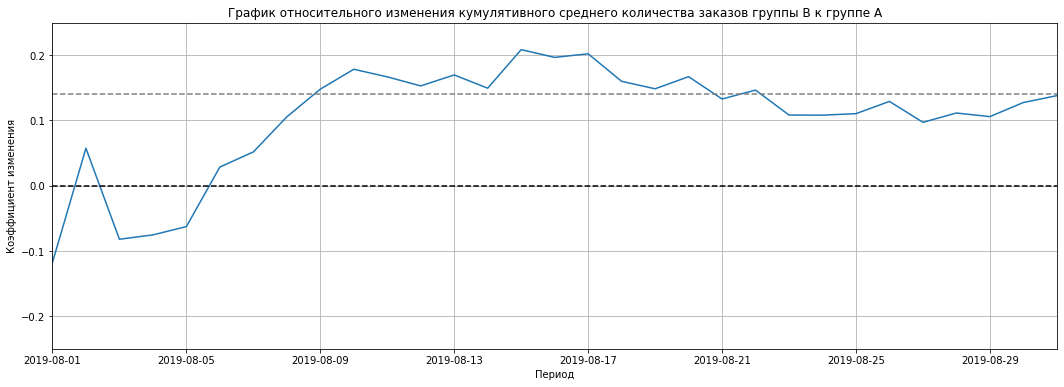

In [ ]:
merged_сumulative_сonversions = (
    cumulative_data_a[['date','conversion']]
    .merge(cumulative_data_b[['date','conversion']],
           left_on='date',
           right_on='date',
           how='left',
           suffixes=['_a', '_b'])
)
plt.figure(figsize=(18, 6))

plt.plot(merged_сumulative_сonversions['date'],
         merged_сumulative_сonversions['conversion_b']/merged_сumulative_сonversions['conversion_a']-1)
plt.ylabel('Коэффициент изменения')
plt.xlabel('Период')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.25, 0.25]);

#### ВЫВОД

В начале теста группа B немного проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь возможно постепенно растёт.

### Точечный график количества заказов по пользователям

In [ ]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['visitor_id', 'orders']

In [ ]:
x_values = pd.Series(range(0,len(orders_by_users)))

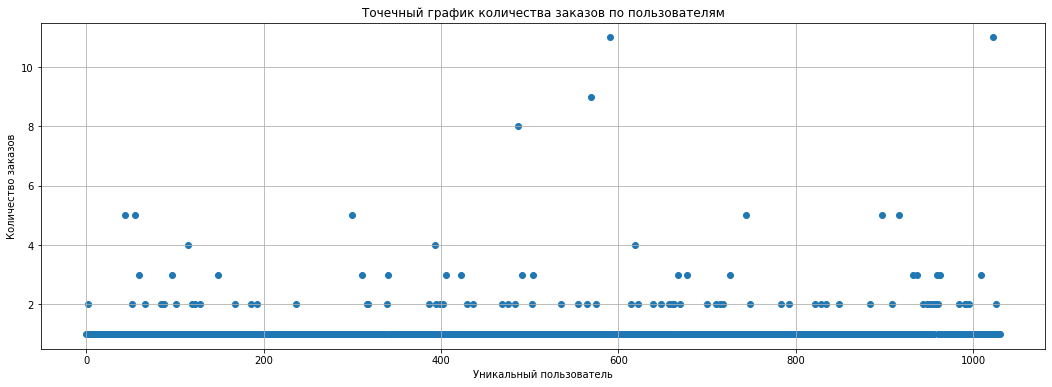

In [ ]:
plt.figure(figsize=(18, 6))
plt.scatter(x_values, orders_by_users['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('Уникальный пользователь')
plt.title('Точечный график количества заказов по пользователям')
plt.grid(True);

#### ВЫВОД

Большинство покупателей заказывали только один раз. Однако  пользователей с 2 заказами тоже явно выделяются. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### 95-й и 99-й перцентили количества заказов на пользователя

In [ ]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

#### ВЫВОД

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз.
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов

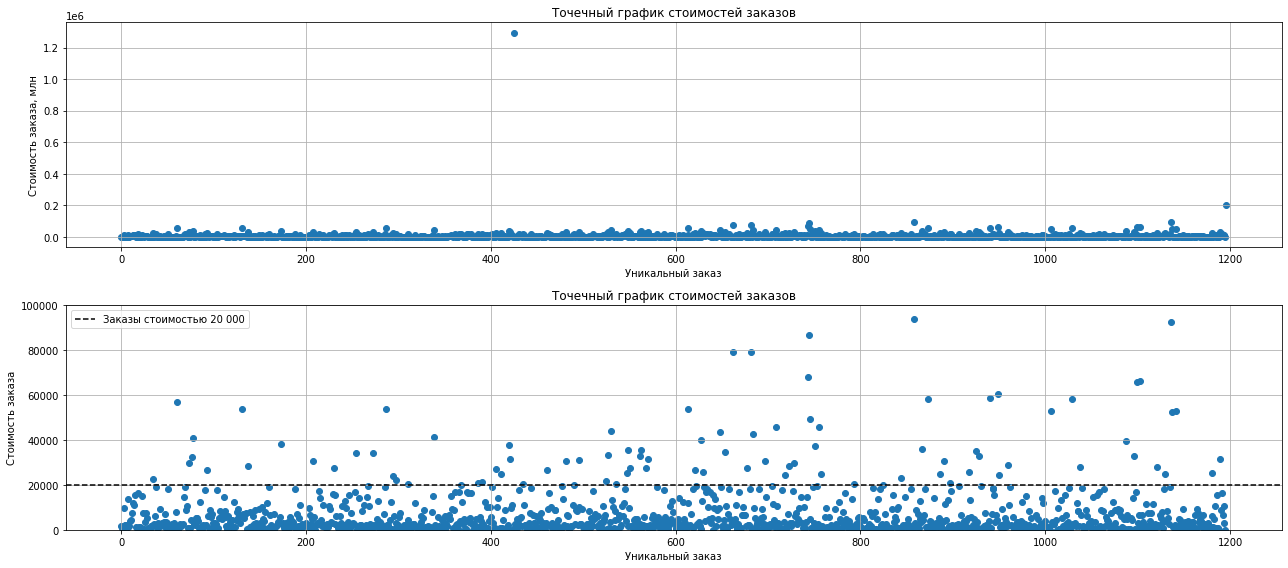

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))

fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(8)
fig.set_figwidth(18)


ax1.scatter(x_values, orders['revenue'])
ax1.set_ylabel('Стоимость заказа, млн')
ax1.set_xlabel('Уникальный заказ')
ax1.set_title('Точечный график стоимостей заказов')
ax1.grid(True)

ax2.scatter(x_values, orders['revenue'])
ax2.set_ylim([0, 100000])
plt.ylabel('Стоимость заказа')
plt.xlabel('Уникальный заказ')
plt.title('Точечный график стоимостей заказов')
plt.axhline(y=20000, color='black', linestyle='--')
plt.legend(['Заказы стоимостью 20 000'])
plt.grid(True)
fig.tight_layout();

#### ВЫВОД

В данных явно большинство заказов всё-таки имеет выручку меньше 20000. Есть немного дорогих заказов.

### 95-й и 99-й перцентили стоимости заказов

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

#### ВЫВОД

Не более 5% заказов стоили более 28000. И 1% заказов стоил более 58234. По причине того, что будет просиходить фильтрация по двум параметрам, разумно выбрать стоимость заказа 58234 за верхнюю границу , и отсеять аномальные заказы.

### Cтатистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

#### Подготовка данных

In [ ]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

In [ ]:
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

In [ ]:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

In [ ]:
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

In [ ]:
df = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

In [ ]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders'] 

In [ ]:
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(
    0, index=np.arange(df['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(
    0, index=np.arange(df['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

#### Расчет статистической разницы

Гипотезы:
- Нулевая гипотеза. Различий в среднем количестве заказов между группами нет. 
- Альтернативная гипотеза. Различия в среднем количестве заказов между группами есть.

Уровень статистической значимости - 0.05

In [ ]:
print("P-value - {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print("Различие в средних - {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

P-value - 0.017
Различие в средних - 0.138


In [ ]:
sample_a.mean(), sample_b.mean()

(0.029728864218616567, 0.033833791499259885)

#### ВЫВОД

**По «сырым» данным различий в среднем числе заказов групп A и B есть.**

P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, **отвергаем**. Относительный выигрыш группы B равен 13.8%

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Гипотезы:
- Нулевая гипотеза. Различий в среднем чеке между группами нет. 
- Альтернативная гипотеза. Различия в среднем чеке между группами есть.

Уровень статистической значимости - 0.05

In [ ]:
print('P-value - {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различие средних - {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value - 0.729
Различие средних - 0.259


#### ВЫВОД

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако относительный выигрыш группы B равен 25.9%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

### Cтатистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

#### Подготовка данных

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 58234 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. Выведим аномальных пользователей и аномальные заказы в отдельную таблицу `abnormal_users`.

In [ ]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > round(np.percentile(orders_by_users['orders'], [95, 99])[0], 2)]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > round(np.percentile(orders_by_users['orders'], [95, 99])[0], 2)]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > round(np.percentile(orders['revenue'], [95, 99])[1], 2)]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head())
print(abnormal_users.shape[0])

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitor_id, dtype: int64
31


**Итого - 31 аномальный пользователь**

In [ ]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#### Расчет статистической разницы

Гипотезы:
- Нулевая гипотеза. Различий в среднем количестве заказов между группами нет.
- Альтернативная гипотеза. Различия в среднем количестве заказов между группами есть.

Уровень статистической значимости - 0.05

In [ ]:
print('P-value - {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Различие средних - {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

P-value - 0.010
Различие средних - 0.174


In [ ]:
sample_a_filtered.mean(), sample_b_filtered.mean()

(0.026455026455026454, 0.031066419687748082)

### ВЫВОД 

**По отфильтрованным данным, присутствуют различия в среднем числе заказов групп A и B .**

Первое число — p-value = 0.010, что меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, **отвергаем**. Относительный выигрыш группы B равен 17.4% 

Скорее всего это говорит о том, что в группе А было большее количество аномальных пользователей с большим количеством заказов, так как различие средних по сырым данным равнялось 13.8%

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Гипотезы:
- Нулевая гипотеза. Различий в среднем чеке между группами нет.
- Альтернативная гипотеза. Различия в среднем чеке между группами есть.

Уровень статистической значимости - 0.05

In [ ]:
print(
    'P-value - {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Различие средних - {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value - 0.798
Различие средних - -0.020


### ВЫВОД
P-value немного увеличился, но и разница между сегментами сократилась с 26% до 2%. И если раньше средний чек группы B был значительно выше среднего чека группы A, то теперь средний чек группы В стал немного ниже среднего чека группы А.

Это может характеризоваться тем, что в группе В было значительно больше аномально дорогих заказов, чем в группе А.

## Дополнительные расчеты


### Подготовка данных

In [ ]:
orders_clear = orders.query('visitor_id not in @abnormal_users')

In [ ]:
orders_aggregated_clear = (
    dates_groups
    .apply(lambda x: orders_clear[np.logical_and(orders_clear['date'] <= x['date'], orders_clear['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}),
           axis=1)
    .sort_values(by=['date','group'])
)

In [ ]:
cumulative_data_clear = orders_aggregated_clear.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulative_data_clear.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [ ]:
cumulative_revenue_clear_a = cumulative_data_clear[cumulative_data_clear['group']=='A'][['date','revenue', 'orders']]

cumulative_revenue_clear_b = cumulative_data_clear[cumulative_data_clear['group']=='B'][['date','revenue', 'orders']]

In [ ]:
merged_cumulative_revenue_clear = (
    cumulative_revenue_clear_a
    .merge(cumulative_revenue_clear_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
)

### Сравнение "сырых" и "очищенных" данных

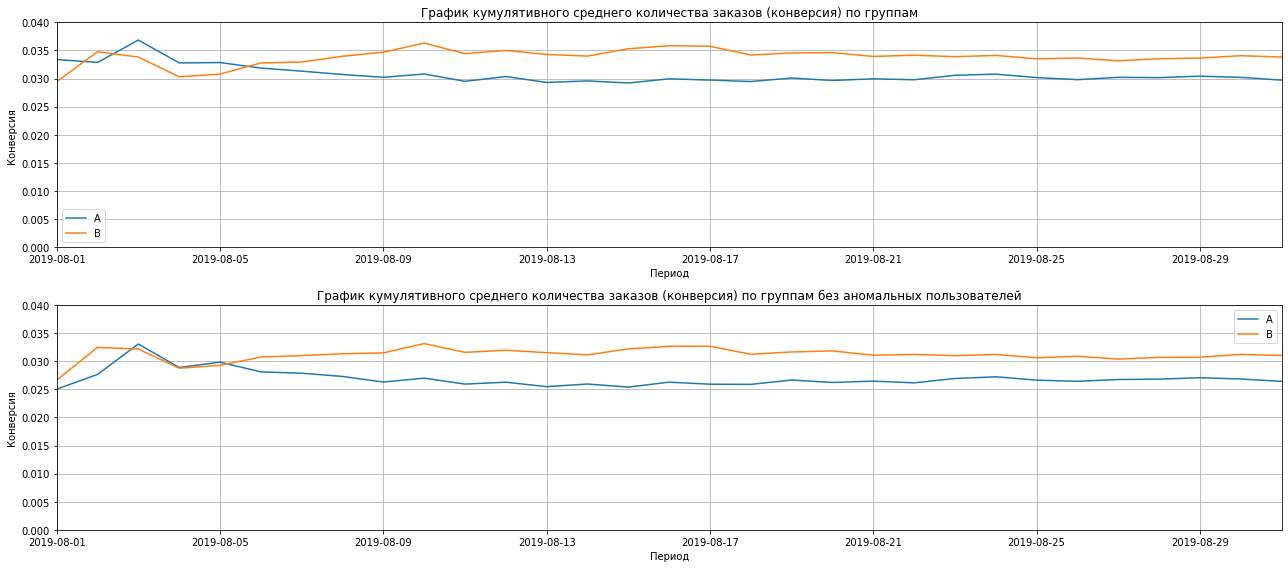

In [ ]:
cumulative_data_clear['conversion'] = cumulative_data_clear['orders']/cumulative_data_clear['visitors']

cumulative_data_clear_a = cumulative_data_clear[cumulative_data_clear['group']=='A']
cumulative_data_clear_b = cumulative_data_clear[cumulative_data_clear['group']=='B']

fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(8)
fig.set_figwidth(18)

ax1.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
ax1.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
ax1.set_ylabel('Конверсия')
ax1.set_xlabel('Период')
ax1.set_title('График кумулятивного среднего количества заказов (конверсия) по группам')
ax1.legend()
ax1.grid(True)
ax1.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.040])

ax2.plot(cumulative_data_clear_a['date'], cumulative_data_clear_a['conversion'], label='A')
ax2.plot(cumulative_data_clear_b['date'], cumulative_data_clear_b['conversion'], label='B')
ax2.set_ylabel('Конверсия')
ax2.set_xlabel('Период')
ax2.set_title('График кумулятивного среднего количества заказов (конверсия) по группам без аномальных пользователей')
ax2.legend()
ax2.grid(True)
ax2.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.040])
fig.tight_layout();

График кумулятивного среднего количества заказаов(конверсия) по группам без аномальных данных стал более сглаженный и немного уменьшился в количественном выражение. **Кардинальные отличия отсутствуют**

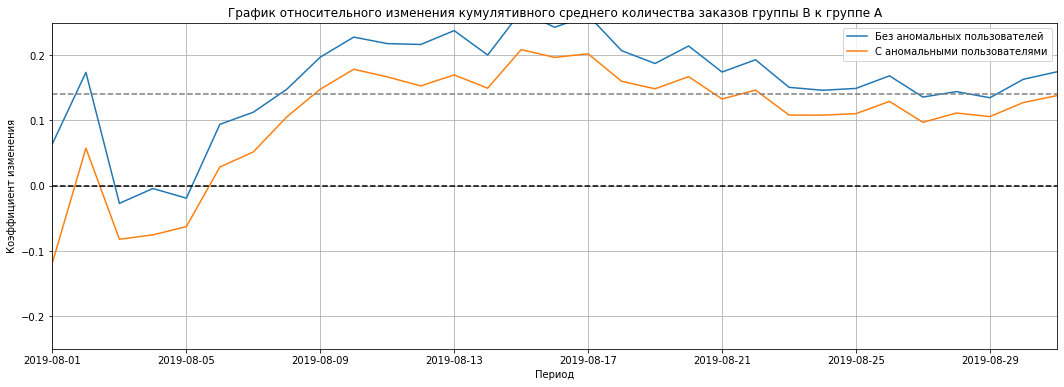

In [ ]:
merged_сumulative_сonversions_cleare = (
    cumulative_data_clear_a[['date','conversion']]
    .merge(cumulative_data_clear_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
)

plt.figure(figsize=(18, 6))
plt.plot(merged_сumulative_сonversions['date'],
         merged_сumulative_сonversions_cleare['conversion_b']/merged_сumulative_сonversions_cleare['conversion_a']-1,
         merged_сumulative_сonversions['date'],
         merged_сumulative_сonversions['conversion_b']/merged_сumulative_сonversions['conversion_a']-1)
plt.ylabel('Коэффициент изменения')
plt.xlabel('Период')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.legend(['Без аномальных пользователей', 'С аномальными пользователями'])
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.25, 0.25]);

**Кардинальные отличия отсутствуют**

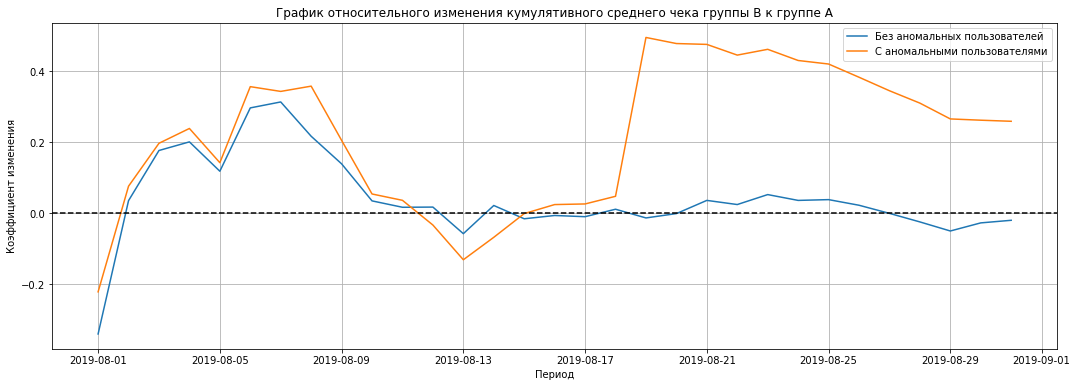

In [ ]:
plt.figure(figsize=(18, 6))

plt.plot(
    merged_cumulative_revenue_clear['date'],
    (merged_cumulative_revenue_clear['revenue_b']/merged_cumulative_revenue_clear['orders_b'])
    /(merged_cumulative_revenue_clear['revenue_a']/merged_cumulative_revenue_clear['orders_a'])-1,
    merged_cumulative_revenue['date'],
    (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])
    /(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)

plt.ylabel('Коэффициент изменения')
plt.xlabel('Период')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.legend(['Без аномальных пользователей', 'С аномальными пользователями'])
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--');

График различия среднего чека с аномальными данными говорит о том, что результаты группы B лучше, чем в группе А, но ухудшаются день ото дня. Но при рассмотрении данных без аномальных значений, видно, что группа В, становиться то немного хуже, то немного лучше. Явного и стабильного отличия между группами нет.

## Вывод

- Нет статистически значимого различия по среднему количеству заказов между группами по «сырым» данным;
- Есть статистически значимое различие по среднему количеству заказов между группами по данным после фильтрации аномалий.  Относительный выигрыш группы B равен 17.3%;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Но по данным после фильтрации сильно измениломь соотношение;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к изменению. Результат не меняется ни при "сырых", ни при "очищенных" данных;
- График различия среднего чека с аномальными данными говорит о том, что результаты группы B лучше, чем в группе А, но ухудшаются день ото дня. Но при рассмотрении данных без аномальных значений, видно, что группа В, становиться то немного хуже, то немного лучше. Явное и стабильное отличие между группами отсутствует.

## Рекомендации

**Исходя из обнаруженных фактов, следует остановить тест и зафиксировать победу группы В**